Esta análise nos ajuda a interpretar dados organizacionais. Ela encontra as tendências relacionadas às pessoas nos dados e permite que o Departamento de RH tome as medidas apropriadas para manter a organização funcionando de forma suave e lucrativa. O atrito em uma configuração corporativa é um dos desafios complexos que os gestores de pessoas e o pessoal das RHs têm que lidar.

https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction 

In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

1. Carregando a base de dados e visualizando os 5 primeiros registros

In [2]:
dados_rh = pd.read_csv('HR-Employee-Attrition.csv')
dados_rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Verificando o número total de linhas e colunas do conjunto de dados
# O primeiro número são as linhas e o segundo, as colunas
dados_rh.shape

(1470, 35)

In [4]:
# Verificnado se há colunas duplicadas.
# São 35 colunas no total, se alguma for duplicada, irá mostrar True
dados_rh.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [5]:
# Verificando se há algum dado ausente, nulo
dados_rh.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Verificando o tipo de dados de cada coluna
dados_rh.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

2. Transformar os dados das colunas que são 'objetos' para tipo numérico

2.1. Coluna Gender (gênero)
<p>Será atribuído 0 para Feminino e 1 para Masculino</p>

2.2. A coluna 'Overtime' também precisa ser transformada para tipo numérico
<p>Se houver overtime (horas extras) será atribuído o número 1 e 0 caso não haja</p>

2.3. Transformando a coluna Attriton (Atrito)
<p>1 para sim e 0 para não</p>

In [7]:
dados_transf = pd.get_dummies(dados_rh, columns=['Gender', 'OverTime'], drop_first=True)
dados_transf

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender_Male,OverTime_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,7,3,3,0,0,0,0,1,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,8,3,3,8,7,3,0,0,1
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,6,3,3,2,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,1,17,3,3,5,2,0,3,1,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,9,5,3,7,7,1,7,1,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,1,6,0,3,6,2,0,3,1,1
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,17,3,2,9,6,0,8,1,0


3. Atritos entre funcionários por Departamento

<AxesSubplot:xlabel='Attrition', ylabel='count'>

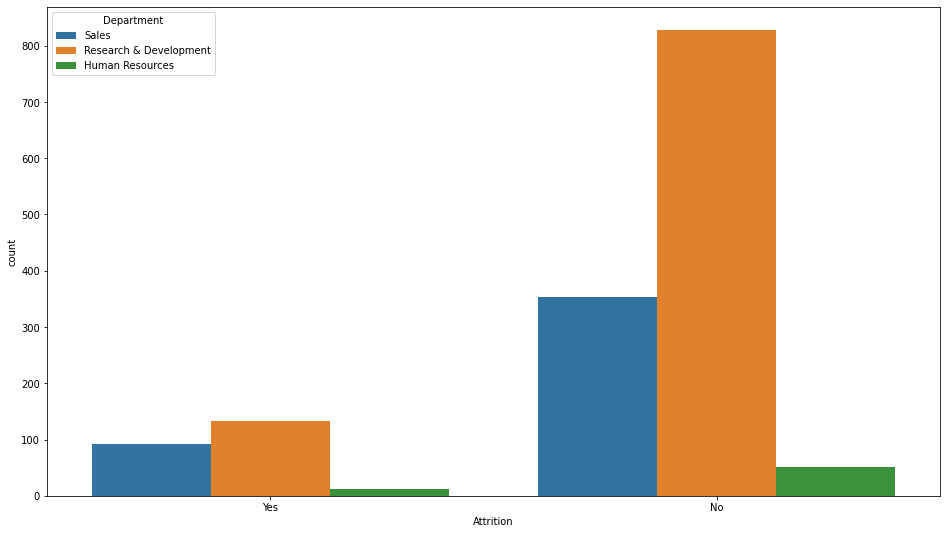

In [8]:
figure(figsize=(16, 9))
sns.countplot(data=dados_transf, x='Attrition', hue='Department')

4. Horas extras por Departamento

<AxesSubplot:xlabel='OverTime_Yes', ylabel='count'>

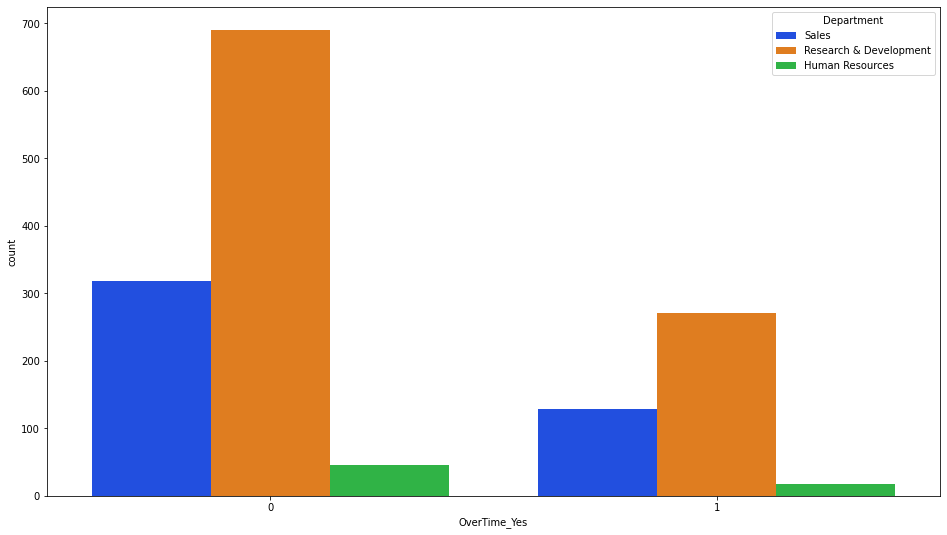

In [9]:
figure(figsize=(16, 9))
sns.countplot(data=dados_transf, x='OverTime_Yes', hue='Department', palette='bright')

5. Número de vezes que fez treinamento no último ano, de acordo com a idade e o sexo

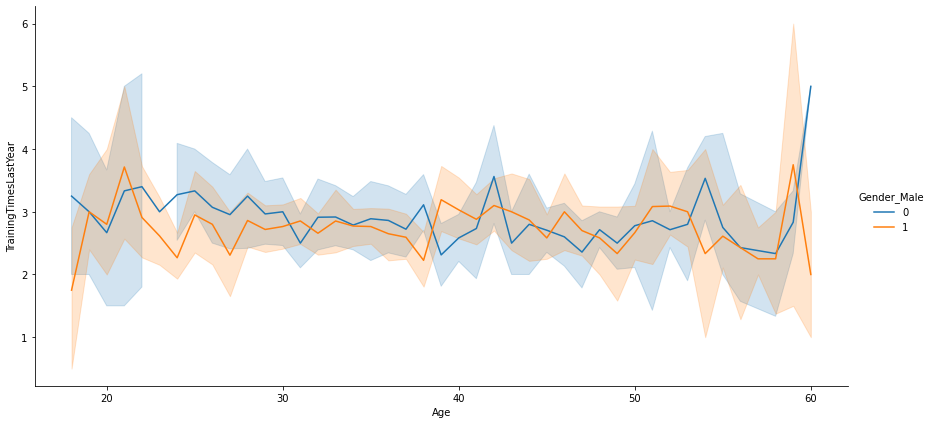

In [15]:
sns.relplot(data=dados_transf, 
            x='Age', 
            y='TrainingTimesLastYear',
            kind='line',
            hue='Gender_Male',
            height=6,
            aspect=2)

6. Relação entre tempo de empresa e anos na mesma função

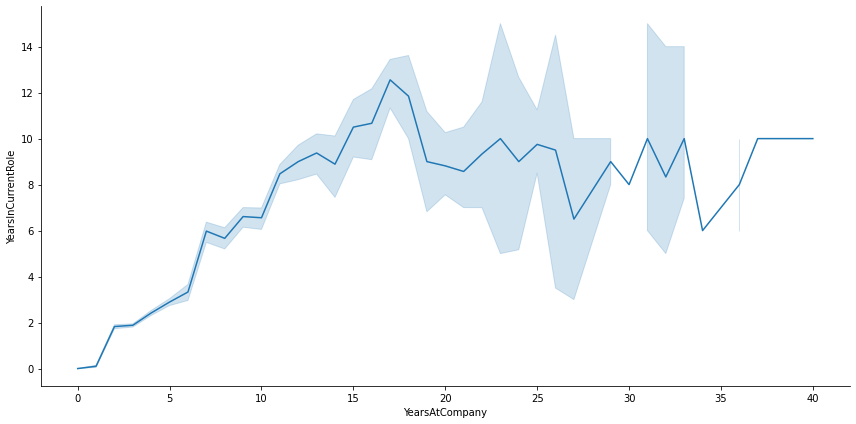

In [11]:
sns.relplot(data=dados_transf, 
            x='YearsAtCompany',
            y='YearsInCurrentRole', 
            kind='line',
            height=6,
            aspect=2,
            legend=True)


6. Relação entre a área de atuação e o aumento salarial percentual, levando em conta a idade

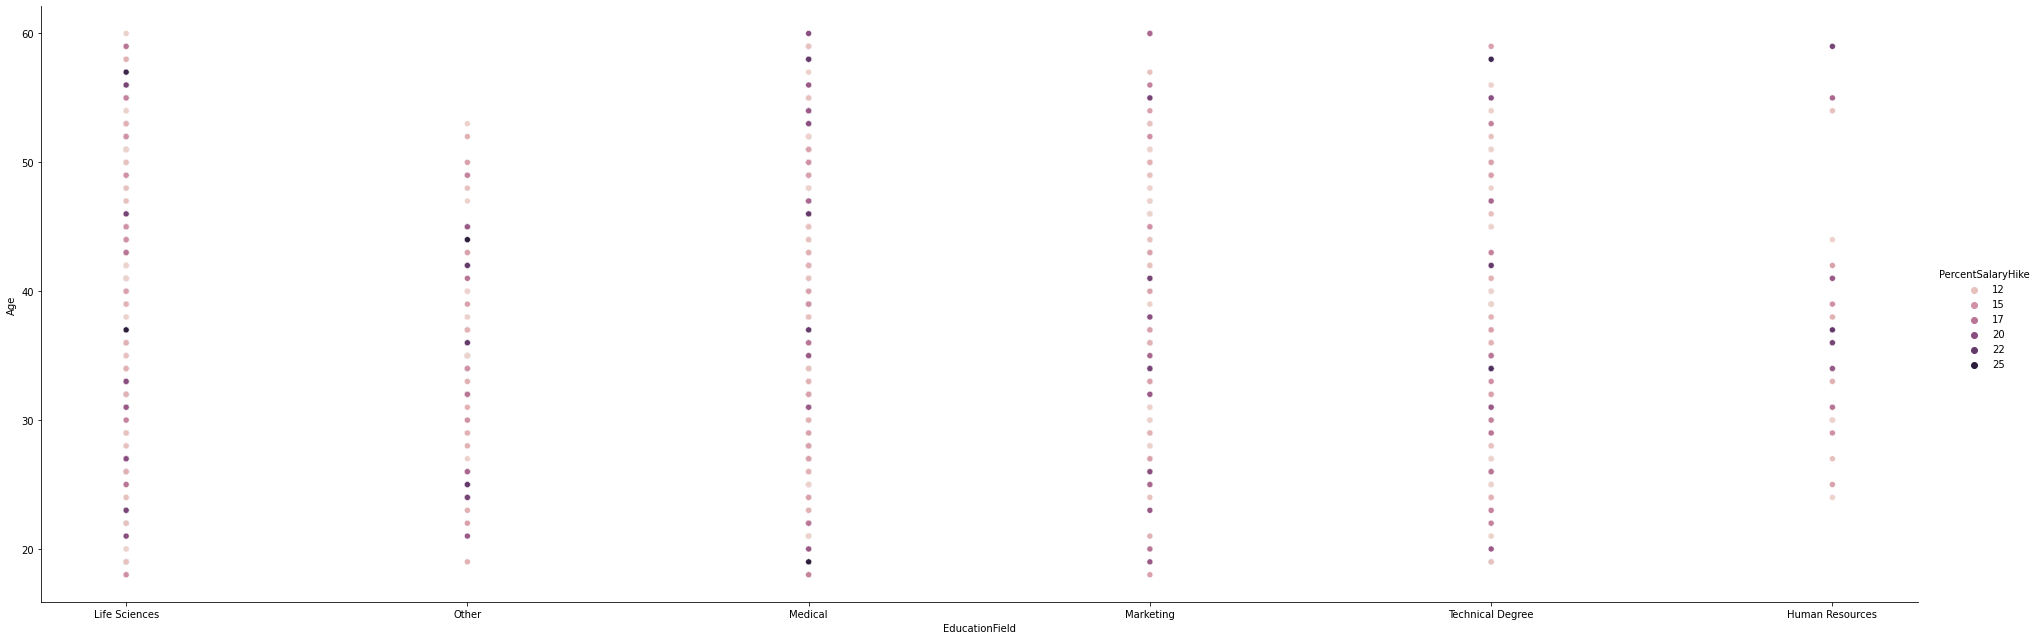

In [14]:
sns.relplot(data=dados_transf, 
             x='EducationField',
            y='Age',
            hue='PercentSalaryHike',
            height=9,
            aspect=3)